In [5]:
from pythreejs import *
import numpy as np
import pandas as pd

from pyntcloud import PyntCloud
from pyntcloud.geometry.models.sphere import create_sphere

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import collections

import os

In [6]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'

#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'

EMBEDED_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Embeded_TS/'

In [30]:
orom = pd.read_csv(EMBEDED_TS_DIR+'oromia_croplands_df_norm_embed_NDVI.csv', names=['x','y','z'], skiprows=1)


In [31]:
def con_hull_vol(df):
    output = []
    #output = pd.DataFrame(columns = ['dekad', 'volume'])
    
    for i in range(1,37):
        
        data = df.loc[i]
        pc = PyntCloud(data)
        con_hull_id = pc.add_structure('convex_hull')
        con_hull = pc.structures[con_hull_id]
        pc.mesh = con_hull.get_mesh()
        vol = con_hull.volume
        #output.append(vol)
        output.append(
        {
            'dekad': i,
            'volume': vol,
    
        }
    )
    
    return pd.DataFrame(output)

In [32]:
vol_df = con_hull_vol(orom)

Text(0.5, 1.0, 'Normalized Soil Moisture Manifold Volume')

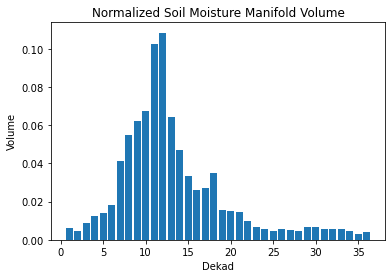

In [33]:
fig = plt.figure()
plt.bar(vol_df.dekad, vol_df.volume)
plt.xlabel('Dekad')
plt.ylabel('Volume')
#plt.xticks(np.arange(1,37,2))
plt.title('Normalized Soil Moisture Manifold Volume')

# Plot manifold volume for all land covers and variables

In [23]:
def con_hull_vol(in_dir):
    landcovers = ('croplands', 'savannas', 'grasslands')
    files = pd.Series(np.array(os.listdir(in_dir)))
    #filter_files = files[files.str.contains('|'.join(landcovers))]
    csvs = pd.Series(files).str.contains('croplands|_savannas|grasslands') #'.csv'
    files = files[csvs]
    #cols = ['NDVI', 'Precip', 'SM', 'LST', 'Temp', 'RefET']
    #outputs = {}
    outputs = collections.OrderedDict()
    
    for filename in files:
        
        this_df = []
        
        df = pd.read_csv(in_dir + str(filename), names=['x','y','z'], skiprows=1)
        #print(df)
        for i in range(1,37):

            #df = pd.read_csv(EMBEDED_TS_DIR+'oromia_croplands_df_norm_embed_SM.csv', names=['x','y','z'], skiprows=1)
            data = df.loc[i]
            pc = PyntCloud(data)
            con_hull_id = pc.add_structure('convex_hull')
            con_hull = pc.structures[con_hull_id]
            pc.mesh = con_hull.get_mesh()
            vol = con_hull.volume
            this_df.append({
                'dekad': i,
                'volume': vol,

            })
        
        outputs[filename] = pd.DataFrame(this_df)
    
    return outputs

In [24]:
volumes = con_hull_vol(EMBEDED_TS_DIR)


In [25]:
volumes.keys()

odict_keys(['oromia_croplands_df_norm_embed_P.csv', 'oromia_savannas_df_norm_embed_P.csv', 'oromia_savannas_df_norm_embed_TMP.csv', 'oromia_croplands_df_norm_embed_SM.csv', 'oromia_croplands_df_norm_embed_refET.csv', 'oromia_savannas_df_norm_embed_LST.csv', 'oromia_savannas_df_norm_embed_SM.csv', 'oromia_savannas_df_norm_embed_NDVI.csv', 'oromia_grasslands_df_norm_embed_P.csv', 'oromia_grasslands_df_norm_embed_NDVI.csv', 'oromia_grasslands_df_norm_embed_refET.csv', 'oromia_croplands_df_norm_embed_TMP.csv', 'oromia_grasslands_df_norm_embed_TMP.csv', 'oromia_croplands_df_norm_embed_NDVI.csv', 'oromia_grasslands_df_norm_embed_LST.csv', 'oromia_savannas_df_norm_embed_refET.csv', 'oromia_croplands_df_norm_embed_LST.csv', 'oromia_grasslands_df_norm_embed_SM.csv'])

In [55]:
#filtered_dict = [{k:v for k, v in i.items() if k in keys} for i in volumes]

In [36]:
sorted(volumes)

['oromia_croplands_df_norm_embed_LST.csv',
 'oromia_croplands_df_norm_embed_NDVI.csv',
 'oromia_croplands_df_norm_embed_P.csv',
 'oromia_croplands_df_norm_embed_SM.csv',
 'oromia_croplands_df_norm_embed_TMP.csv',
 'oromia_croplands_df_norm_embed_refET.csv',
 'oromia_grasslands_df_norm_embed_LST.csv',
 'oromia_grasslands_df_norm_embed_NDVI.csv',
 'oromia_grasslands_df_norm_embed_P.csv',
 'oromia_grasslands_df_norm_embed_SM.csv',
 'oromia_grasslands_df_norm_embed_TMP.csv',
 'oromia_grasslands_df_norm_embed_refET.csv',
 'oromia_savannas_df_norm_embed_LST.csv',
 'oromia_savannas_df_norm_embed_NDVI.csv',
 'oromia_savannas_df_norm_embed_P.csv',
 'oromia_savannas_df_norm_embed_SM.csv',
 'oromia_savannas_df_norm_embed_TMP.csv',
 'oromia_savannas_df_norm_embed_refET.csv']

In [69]:
list(volumes.values())[0]

,dekad,volume
0,1,0.040255
1,2,0.135235
2,3,0.389998
3,4,0.179931
4,5,0.240610
5,6,0.666548
6,7,0.724113
7,8,0.847935
8,9,1.320517
9,10,1.165877


Text(-0.6, -1, 'Volume')

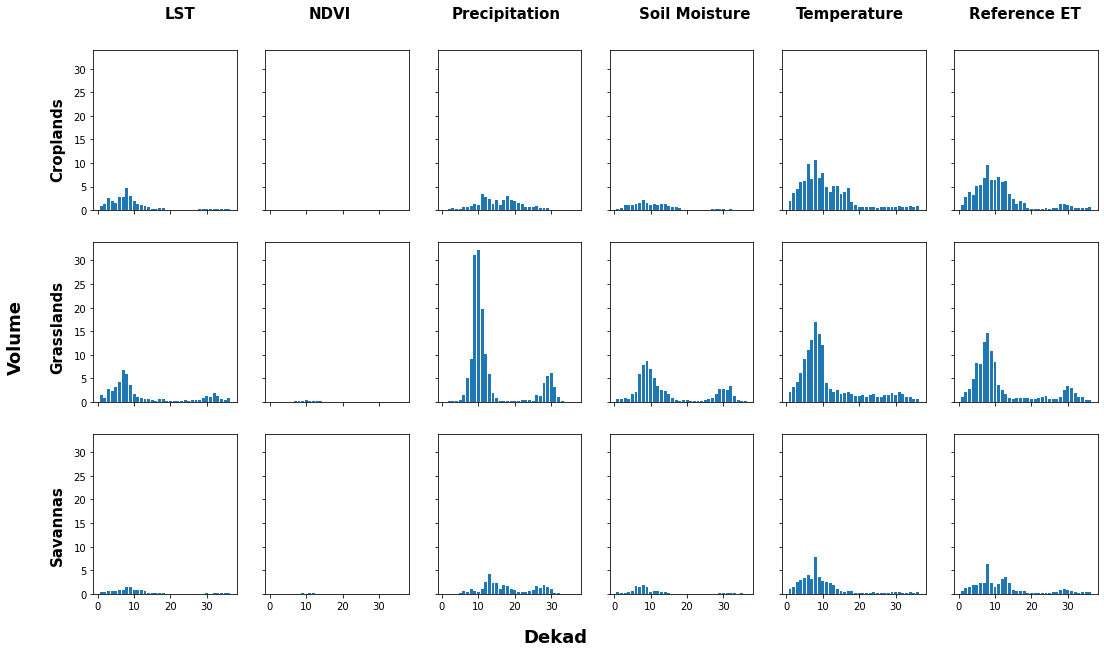

In [85]:
fig, axs = plt.subplots(3, 6, figsize=(18,10), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'SM', 'LST', 'Temp', 'RefET']
lc_list = ['Croplands', 'Grasslands', 'Savannas']

for i, key in enumerate(sorted(volumes)):
    data = volumes[key]
    im = axs[i].bar(data.dekad, data.volume)
    
axs[0].text(-0.3, 0.2, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold', rotation = 90)
axs[0].text(-0.3, -1, 'Grasslands', transform=axs[0].transAxes, size=15, fontweight='bold', rotation = 90)
axs[0].text(-0.3, -2.2, 'Savannas', transform=axs[0].transAxes, size=15, fontweight='bold', rotation = 90)
axs[0].text(0.5, 1.2, 'LST', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.5, 1.2, 'NDVI', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(2.5, 1.2, 'Precipitation', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(3.8, 1.2, 'Soil Moisture', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(4.9, 1.2, 'Temperature', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(6.1, 1.2, 'Reference ET', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(3, -2.7, 'Dekad', transform=axs[0].transAxes, size=18, fontweight='bold')
axs[0].text(-0.6, -1, 'Volume', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)
#axs[9].text(0.9, 2, 'Simplex Projection Rho Measure of Error Between Obs vs Pred ', transform=axs[0].transAxes, size=15, fontweight='bold')


Volume difference from sphere

In [10]:
cloud = PyntCloud(create_sphere(center=[0,0,0], radius = 25, n_points = 1000000))

In [11]:
convex_hull_id = cloud.add_structure('convex_hull')
convex_hull = cloud.structures[convex_hull_id]

In [12]:
print(convex_hull.volume)

65448.79753476199


In [13]:
print((4/3) * np.pi * (25**3))

65449.84694978735


In [15]:
x

array([0.689484, 0.476483, 0.58677 , 1.068768, 1.43806 , 1.483567,
       1.163844, 1.491083, 1.970356, 1.961689, 1.823355, 1.868743,
       1.437345, 1.248269, 1.108745, 1.670774, 1.503391, 1.406028,
       1.97107 , 1.853437, 1.361601, 1.139926, 1.949556, 2.323108,
       2.558936, 2.650508, 2.431305, 2.026224, 1.971259, 1.168452,
       1.342775, 1.129037, 0.871781, 0.855148, 0.395625, 1.051331,
       1.309558, 1.876837, 2.620561, 2.508878, 2.646833, 2.448341,
       1.610501, 1.925691, 1.9184  , 1.910517, 2.450736, 2.381144,
       2.1596  , 2.379856, 2.254824, 2.32    , 1.698536, 1.527831,
       1.530377, 1.67204 , 1.534793, 1.886021, 2.062097, 2.128729,
       2.057646, 2.155564, 2.698137, 3.066121, 3.925938, 4.240422,
       3.907132, 3.750647, 2.918651, 2.980647, 2.992436, 2.71034 ,
       2.693541, 2.361263, 1.897547, 2.345557, 2.007566, 1.599818,
       1.182395, 1.469907, 1.460792, 1.11318 , 0.879555, 1.351152,
       1.392628, 1.926062, 1.211311, 0.913065, 1.363192, 2.032

Testing out pyplot mesh plotting

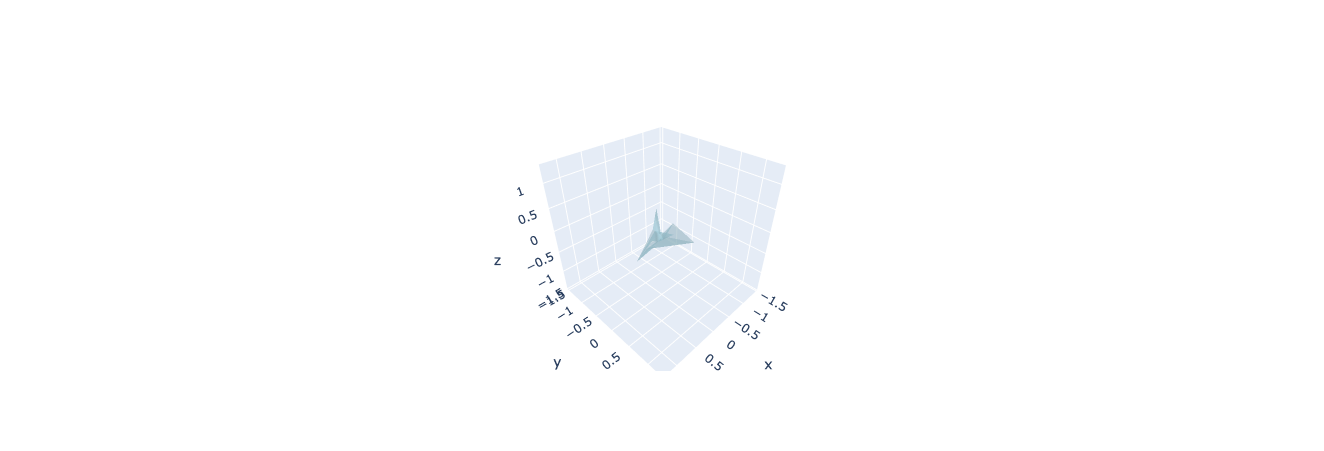

In [40]:
fig = go.Figure(data=[go.Mesh3d(x=orom_d4.x, y=orom_d4.y, z=orom_d4.z, color='lightblue', opacity=0.50)])
fig.show() 

Point cloud to voxel density from sfm 

In [ ]:
def get_density(points, resolution=0.1):
    """ Resamples an X,Y,Z pointcloud at a specific resolution and 
    returns a dataframe of total density in each resampled cell.
    
    Usage: density = get_density(points, resolution)
    
        points: pandas dataframe containing point cloud with X,Y,Z coordinates
        resolution: size of resampling cell (meters) in X and Y dimensions (default = 0.1 meters)
    
    """
    points['Xidx'] = (points.X/resolution).astype(int)
    points['Yidx'] = (points.Y/resolution).astype(int)
    
    density = points.groupby(['Xidx','Yidx']).count()
    density = density.reset_index()

    # Drop the original X and Y axes, and reassign.
    density.drop(['X', 'Y'], axis=1, inplace=True)
    density.columns = ['X', 'Y', 'total']
    return density